In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## <font face="gotham" color="purple"> Example of Office Dataset</font>

Here is an example of visualization. Two critical skills are presented:
1. Loop through data

In [160]:
df = pd.read_csv('the_office_series.csv', index_col = 0)


**datasets/office_episodes.csv**<br>
**episode_number**: Canonical episode number.<br>
**season**: Season in which the episode appeared.<br>
**episode_title**: Title of the episode.<br>
**description**: Description of the episode.<br>
**ratings**: Average IMDB rating.<br>
**votes**: Number of votes.<br>
**viewership_mil**: Number of US viewers in millions.<br>
**duration**: Duration in number of minutes.<br>
**release_date**: Airdate.<br>
**guest_stars**: Guest stars in the episode (if any).<br>
**director**: Director of the episode.<br>
**writers**: Writers of the episode.<br>
**has_guests**: True/False column for whether the episode contained guest stars.<br>
**scaled_ratings**: The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).<br>


Create a matplotlib scatter plot of the data that contains the following attributes:
<ul>
<li>Each episode's episode number plotted along the x-axis</li><br>
<li>Each episode's viewership (in millions) plotted along the y-axis<br>
<li>A color scheme reflecting the scaled ratings (not the regular ratings) of each episode, such that:<br>
Ratings < 0.25 are colored "red"<br>
Ratings >= 0.25 and < 0.50 are colored "orange"<br>
Ratings >= 0.50 and < 0.75 are colored "lightgreen"<br>
Ratings >= 0.75 are colored "darkgreen"<br>
<li>A sizing system, such that episodes with guest appearances have a marker size of 250 and episodes without are sized 25</li><br>
<li>A title, reading "Popularity, Quality, and Guest Appearances on the Office"</li><br>
<li>An x-axis label reading "Episode Number"</li><br>
<li>A y-axis label reading "Viewership (Millions</li><br>
<li>Provide the name of one of the guest stars (hint, there were multiple!) who was in the most watched Office episode. Save it as a string in the variable top_star (e.g. top_star = "Will Ferrell").</li>
</ul>

In lambda function, it is suggest to use only ```if-else```, but with nested layers can be very messy.

In [141]:
### Create epsiode column
df['nr_episode'] = np.arange(1, df.shape[0]+1)

# Create marker size column
df['size_marker'] = df['GuestStars'].isnull().astype(int).apply(lambda x: 25 if x == 1 else 250)

# Create color column
rating_desc = df['Ratings'].describe()
perctl_25 = rating_desc[4]
perctl_50 = rating_desc[5]
perctl_75 = rating_desc[6]
df['color'] = df['Ratings'].apply(lambda x: 'red' if (x < perctl_25) 
                                  else ('orange' if (x>=perctl_25) & (x<perctl_50) 
                                        else ('#90EE90' if (x>=perctl_50) & (x<perctl_75) else '#006400')))

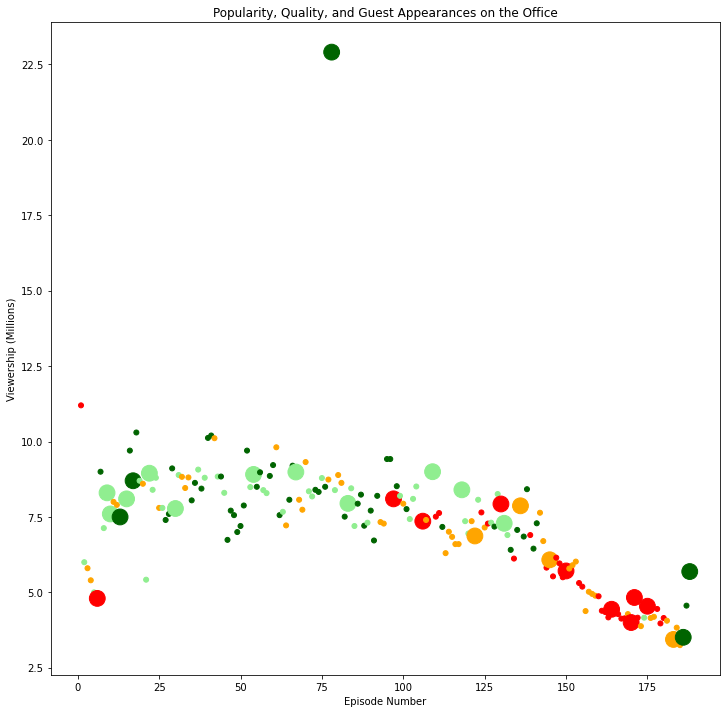

In [142]:

fig, ax = plt.subplots(figsize = (12, 12))

## Create color filter by percentile**
rating_desc = df['Ratings'].describe()
perctl_25 = rating_desc[4]
perctl_50 = rating_desc[5]
perctl_75 = rating_desc[6]

## One line only##
ax.scatter(df['nr_episode'], df['Viewership'], color = df['color'], s = df['size_marker'])
ax.set_xlabel('Episode Number')
ax.set_ylabel('Viewership (Millions)')
ax.set_title('Popularity, Quality, and Guest Appearances on the Office')
plt.show()

In [143]:
df.head()

,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,nr_episode,size_marker,color
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,1,25,red
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak,2,25,#90EE90
2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein,3,25,orange
3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur,4,25,orange
4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels,5,25,#90EE90


## <font face="gotham" color="purple"> Alternative Way Of Creating Color And Array</font>

In [168]:
df.head(2)

,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak


In [187]:
colors = []
for ind, row in df.iterrows():
    if row['Ratings'] < perctl_25:
        colors.append('red')
    elif row['Ratings'] < perctl_50:
        colors.append('orange')
    elif row['Ratings'] < perctl_75:
        colors.append('lightgreen')
    else:
        colors.append('darkgreen')

In [188]:
df['GuestStars'] = df['GuestStars'].fillna(0)
sizes = []
for ind, row in df.iterrows():
    if row['GuestStars'] == 0:
        sizes.append(25)
    else:
        sizes.append(250)

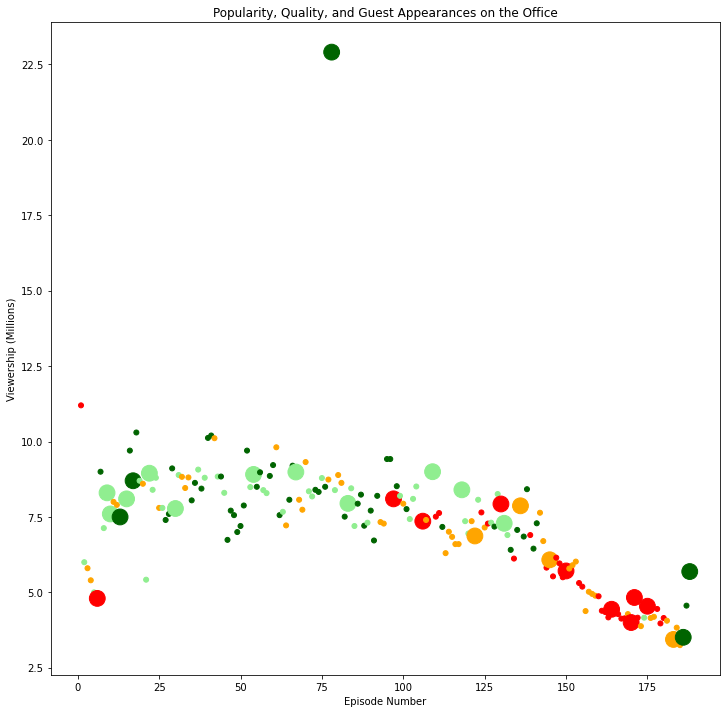

In [189]:
df['nr_episode'] = np.arange(1, df.shape[0]+1)
fig, ax = plt.subplots(figsize = (12, 12))
ax.scatter(df['nr_episode'], df['Viewership'], color = colors, s = sizes)
ax.set_xlabel('Episode Number')
ax.set_ylabel('Viewership (Millions)')
ax.set_title('Popularity, Quality, and Guest Appearances on the Office')
plt.show()